In [1]:
install.packages('dHSIC')
library(dHSIC)

install.packages('gsubfn')
library(gsubfn)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: proto

Could not load tcltk.  Will use slower R code instead.



In [5]:
# permutation 
nvals <- matrix(seq(from = 100, to = 1000, by = 100))
perm_counts <- matrix(0, 1, length(nvals))

for (i in seq_along(nvals)) {
    n = nvals[i]
    count <- 0
    for (m in 1:1000) {
        x <- matrix(rnorm(n),ncol=1)
        y <- matrix(rnorm(n),ncol=1)
        z <- matrix(rnorm(n),ncol=1)
        list[stat, critval, , ] <- dhsic.test(list(x,y,z), alpha = 0.05, method="permutation", kernel="gaussian",
                           pairwise=FALSE, matrix.input=FALSE, B=25)
        if (stat > critval) {
            count <- count + 1
        }
    }
    perm_counts[i] <- count
}

perm_counts

38,32,49,50,36,31,34,33,42,45


In [3]:
# bootstrap
nvals <- matrix(seq(from = 100, to = 1000, by = 100))
boot_counts <- matrix(0, 1, length(nvals))

for (i in seq_along(nvals)) {
    n = nvals[i]
    count <- 0
    
    for (m in 1:1000) {
        x <- matrix(rnorm(n),ncol=1)
        y <- matrix(rnorm(n),ncol=1)
        z <- matrix(rnorm(n),ncol=1)
        list[stat, critval, , ] <- dhsic.test(list(x,y,z), alpha = 0.05, method="bootstrap", kernel="gaussian",
                           pairwise=FALSE, matrix.input=FALSE, B=25)
        if (stat > critval) {
            count <- count + 1
        }
    }
    boot_counts[i] <- count
}

boot_counts

50,30,41,35,37,47,31,44,42,30


In [4]:
# gamma
nvals <- matrix(seq(from = 100, to = 1000, by = 100))
gamma_counts <- matrix(0, 1, length(nvals))

for (i in seq_along(nvals)) {
    n = nvals[i]
    count <- 0
    
    for (m in 1:1000) {
        x <- matrix(rnorm(n),ncol=1)
        y <- matrix(rnorm(n),ncol=1)
        z <- matrix(rnorm(n),ncol=1)
        list[stat, critval, , ] <- dhsic.test(list(x,y,z), alpha = 0.05, method="gamma", kernel="gaussian",
                           pairwise=FALSE, matrix.input=FALSE, B=25)
        if (stat > critval) {
            count <- count + 1
        }
    }
    gamma_counts[i] <- count
}

gamma_counts

64,62,61,62,61,54,56,61,47,64


In [4]:
perm_counts <- c(38, 32, 49, 50, 36, 31, 34, 33, 42, 45)
boot_counts <- c(50, 30, 41, 35, 37, 47, 31, 44, 42, 30)
gamma_counts <- c(64, 62, 61, 62, 61, 54, 56, 61, 47, 64)
nvals <- matrix(seq(from = 100, to = 1000, by = 100))

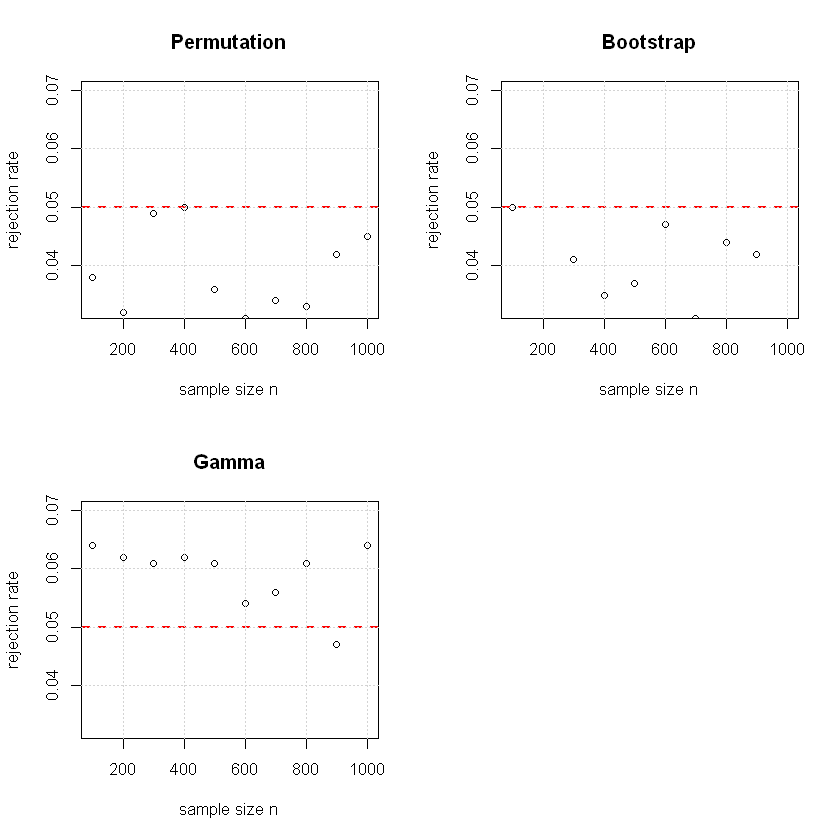

In [31]:
par(mfrow=c(2,2))
perm_rejection_rate <- perm_counts/1000
p1 <- plot(nvals, perm_rejection_rate, main='Permutation', xlab='sample size n', ylab = 'rejection rate', ylim=c(0.0325,0.07))
abline(h=0.05, col="red", lwd=2, lty=2)
grid()
boot_rejection_rate <- boot_counts/1000
p2 <- plot(nvals, boot_rejection_rate, main='Bootstrap', xlab='sample size n', ylab = 'rejection rate', ylim=c(0.0325,0.07))
abline(h=0.05, col="red", lwd=2, lty=2)
grid()
gamma_rejection_rate <- gamma_counts/1000
p3 <- plot(nvals, gamma_rejection_rate, main='Gamma', xlab='sample size n', ylab = 'rejection rate', ylim=c(0.0325,0.07))
abline(h=0.05, col="red", lwd=2, lty=2)
grid()

#grid.arrange(p1, p2, p3, nrow = 1)

![Fig](fig_paper.JPG)